In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import warnings


warnings.filterwarnings("ignore")

## Dataset

In [3]:

dataset = pd.read_json("sarcasm.json")

## Cleaning

In [4]:
dataset.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
dataset.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


Drop article_link column

In [6]:
df = dataset.drop(["article_link"], axis = 1)

## Tokenizer

In [7]:
VOCAB_SIZE = 30000
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = "OOV")
tokenizer.fit_on_texts(df.headline.values)
headline_sequences = tokenizer.texts_to_sequences(df.headline.values)

Check dictionary

In [8]:
tokenizer.word_index

{'OOV': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'at': 15,
 'from': 16,
 'about': 17,
 'by': 18,
 'after': 19,
 'you': 20,
 'this': 21,
 'out': 22,
 'up': 23,
 'be': 24,
 'as': 25,
 'that': 26,
 'it': 27,
 'how': 28,
 'not': 29,
 'he': 30,
 'his': 31,
 'are': 32,
 'your': 33,
 'just': 34,
 'what': 35,
 'all': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'report': 40,
 'into': 41,
 'more': 42,
 'one': 43,
 'have': 44,
 'year': 45,
 'over': 46,
 'why': 47,
 'day': 48,
 'u': 49,
 'area': 50,
 'woman': 51,
 'can': 52,
 's': 53,
 'says': 54,
 'donald': 55,
 'time': 56,
 'first': 57,
 'like': 58,
 'no': 59,
 'her': 60,
 'get': 61,
 'off': 62,
 'old': 63,
 "trump's": 64,
 'life': 65,
 'now': 66,
 'people': 67,
 "'": 68,
 'an': 69,
 'house': 70,
 'still': 71,
 'obama': 72,
 'white': 73,
 'back': 74,
 'make': 75,
 'was': 76,
 'than': 77,
 'women': 78,
 'if': 79,
 'down': 80,
 'when': 81,
 'i'

Find maximum length of sublists

In [9]:
headline_sequences[0]

[16004, 355, 3167, 7474, 2644, 3, 661, 1119]

In [10]:
len_each_sublist = [len(sublist) for sublist in headline_sequences]

In [11]:
max(len_each_sublist)

152

Maximum length of sublists is 152

In [12]:
MAX_LEN = 152

### Padding

In [13]:
padded_headline_seq = pad_sequences(headline_sequences, truncating = 'post', padding = 'post', maxlen = MAX_LEN)

## Train Test Split

### Set random state 

In [14]:
RS  = 13

In [15]:
X_train, X_test, y_train, y_test = train_test_split(padded_headline_seq, df.is_sarcastic, test_size = 0.2, random_state = RS)

## Models

In [16]:
EPOCHS = 100

### Simple Neural Network

In [48]:
def build_snn_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((X_train.shape[1],)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [49]:
snn_model = build_snn_model()
snn_history = snn_model.fit(X_train,y_train, epochs = EPOCHS)

Epoch 1/100
716/716 [==============================] - 3s 2ms/step - loss: 45.9679 - accuracy: 0.5215
Epoch 2/100
716/716 [==============================] - 2s 2ms/step - loss: 16.9794 - accuracy: 0.5297
Epoch 3/100
716/716 [==============================] - 2s 2ms/step - loss: 9.3965 - accuracy: 0.5406
Epoch 4/100
716/716 [==============================] - 2s 2ms/step - loss: 5.9623 - accuracy: 0.5396
Epoch 5/100
716/716 [==============================] - 2s 2ms/step - loss: 3.7019 - accuracy: 0.5426
Epoch 6/100
716/716 [==============================] - 2s 2ms/step - loss: 2.5597 - accuracy: 0.5426
Epoch 7/100
716/716 [==============================] - 2s 2ms/step - loss: 1.6898 - accuracy: 0.5476
Epoch 8/100
716/716 [==============================] - 2s 2ms/step - loss: 1.2925 - accuracy: 0.5487
Epoch 9/100
716/716 [==============================] - 2s 2ms/step - loss: 1.0584 - accuracy: 0.5483
Epoch 10/100
716/716 [==============================] - 2s 2ms/step - loss: 0.9379 - accu

In [50]:
snn_history_df = pd.DataFrame(snn_history.history)
snn_history_df.index = snn_history_df.index + 1
snn_history_df.reset_index().rename(columns = {"index" : "epochs"})

,epochs,loss,accuracy
0,1,45.967876,0.521511
1,2,16.979410,0.529679
2,3,9.396522,0.540598
3,4,5.962260,0.539550
4,5,3.701943,0.542608
...,...,...,...
95,96,0.665823,0.583534
96,97,0.667997,0.583490
97,98,0.667710,0.582092
98,99,0.668409,0.577550


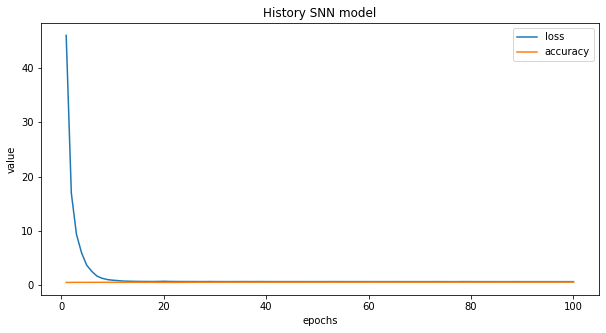

In [51]:
snn_history_df.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History SNN model")
plt.show()

179/179 [==============================] - 0s 3ms/step
SNN f1_score: 0.23118603251053585
              precision    recall  f1-score   support

           0       0.54      0.93      0.69      3003
           1       0.64      0.14      0.23      2721

    accuracy                           0.55      5724
   macro avg       0.59      0.53      0.46      5724
weighted avg       0.59      0.55      0.47      5724



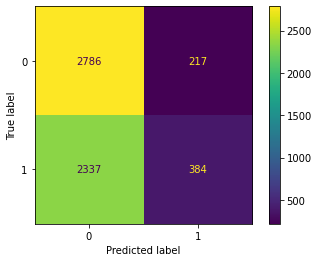

In [77]:
snn_notfinal_predict = snn_model.predict(X_test)
snn_predict = np.where(snn_notfinal_predict > 0.5, 1, 0)
snn_f1_score = f1_score(y_test, snn_predict)
print(f"SNN f1_score: {snn_f1_score}")
snn_class_report = classification_report(y_test, snn_predict)
print(snn_class_report)
snn_conf = confusion_matrix(y_test, snn_predict)
snn_conf_plot = ConfusionMatrixDisplay(snn_conf)
snn_conf_plot.plot()
plt.show()

### Complicated Neural Network (Embedding, Conv1D, MaxPool1D, ...)

In [28]:
EMBEDDING_DIM = 150

## Embedding(input_dim, output_dim, input_length = ?)

## Conv1D filters, kernel_size

## MaxPool1D pool_size

In [54]:
def build_cmp_model():
    model = keras.Sequential()
    model.add(keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length = X_train.shape[1]))
    model.add(keras.layers.Conv1D(16, 3, activation = 'relu'))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [55]:
cmp_model = build_cmp_model()
cmp_history = cmp_model.fit(X_train,y_train, epochs = EPOCHS)

Epoch 1/100
716/716 [==============================] - 53s 73ms/step - loss: 0.4021 - accuracy: 0.8087
Epoch 2/100
716/716 [==============================] - 60s 84ms/step - loss: 0.1439 - accuracy: 0.9448
Epoch 3/100
716/716 [==============================] - 54s 76ms/step - loss: 0.0422 - accuracy: 0.9866
Epoch 4/100
716/716 [==============================] - 49s 68ms/step - loss: 0.0136 - accuracy: 0.9961
Epoch 5/100
716/716 [==============================] - 49s 68ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 6/100
716/716 [==============================] - 50s 70ms/step - loss: 0.0043 - accuracy: 0.9989
Epoch 7/100
716/716 [==============================] - 54s 75ms/step - loss: 0.0053 - accuracy: 0.9984
Epoch 8/100
716/716 [==============================] - 51s 72ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 9/100
716/716 [==============================] - 56s 78ms/step - loss: 0.0042 - accuracy: 0.9988
Epoch 10/100
716/716 [==============================] - 60s 83ms/step - l

In [56]:
cmp_history_df = pd.DataFrame(cmp_history.history)
cmp_history_df.index = cmp_history_df.index + 1
cmp_history_df.reset_index().rename(columns = {"index" : "epochs"})

,epochs,loss,accuracy
0,1,0.402094,0.808736
1,2,0.143896,0.944791
2,3,0.042175,0.986635
3,4,0.013571,0.996113
4,5,0.007623,0.997641
...,...,...,...
95,96,0.000310,0.999956
96,97,0.000209,0.999913
97,98,0.000612,0.999782
98,99,0.000039,1.000000


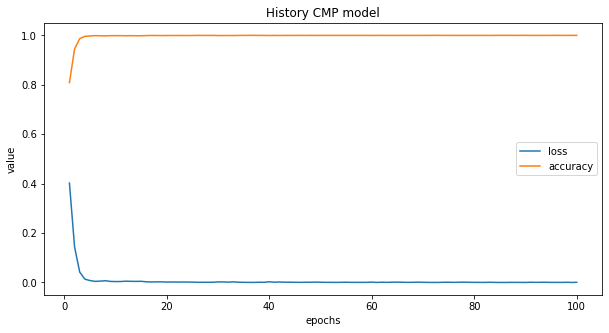

In [57]:
cmp_history_df.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History CMP model")
plt.show()

179/179 [==============================] - 1s 6ms/step
CMP f1_score: 0.8415308486209089
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      3003
           1       0.87      0.79      0.83      2721

    accuracy                           0.84      5724
   macro avg       0.85      0.84      0.84      5724
weighted avg       0.84      0.84      0.84      5724



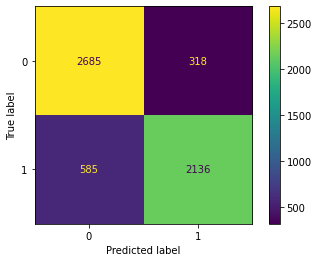

In [75]:
cmp_notfinal_predict = cmp_model.predict(X_test)
cmp_predict = np.where(cmp_notfinal_predict > 0.5, 1, 0)
cmp_f1_score = f1_score(y_test,cmp_predict, average = 'weighted')
print(f"CMP f1_score: {cmp_f1_score}")
cmp_class_report = classification_report(y_test, cmp_predict)
print(cmp_class_report)
cmp_conf = confusion_matrix(y_test, cmp_predict)
cmp_conf_plot = ConfusionMatrixDisplay(cmp_conf)
cmp_conf_plot.plot()
plt.show()

In [ ]:
# Author: amyrmahdy
# Date: 14 Jan 2023